# Spawners

Spawners allow you to define an area where certain Scene Elements will appear randomly.
This can be interesting in foraging scenario, where agents move around to collect rewards.

pygame 2.0.1 (SDL 2.0.14, Python 3.7.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


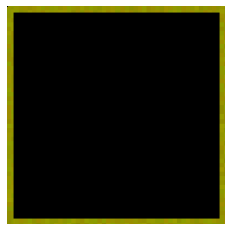

In [1]:
from simple_playgrounds.playgrounds.layouts import SingleRoom
from simple_playgrounds.engine import Engine

%matplotlib inline
import matplotlib.pyplot as plt


def plt_image(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
my_playground = SingleRoom(size=(200, 200))

# we use the option screen=True to use a keyboard controlled agent later on.
engine = Engine(time_limit=1000, playground=my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode=True))

Now that we have an empty playground, lets create a spawner that produces candies in the top-left area of the playground.

In [2]:
from simple_playgrounds.elements.collection.contact import Candy
from simple_playgrounds.elements.spawner import Spawner
from simple_playgrounds.common.position_utils import CoordinateSampler

area = CoordinateSampler(center=(50, 150), area_shape='circle', radius=30)
spawner = Spawner(probability=0.1, max_elements_in_playground=10, element_produced=Candy, production_area=area)
my_playground.add_spawner(spawner)

Now we can let the playground run for some time, and see if the spawner produces candies.

Run the following cell multiple times.

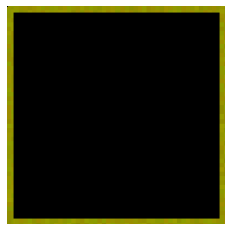

In [3]:
engine.run(steps=10)

plt_image(engine.generate_playground_image(plt_mode=True))

In [4]:
engine.terminate()

Finally, we can add an agent controlled by a keyboard.
We see that the Candies are replaced little by little.

In [5]:
from simple_playgrounds.agents.parts.controllers import Keyboard
from simple_playgrounds.agents.agents import BaseAgent

my_playground = SingleRoom(size=(200, 200))
engine = Engine(time_limit=10000, playground=my_playground, screen=True)

area = CoordinateSampler(center=(100, 100), area_shape='circle', radius=60)
spawner = Spawner(probability=0.05, production_limit=100, max_elements_in_playground=10, element_produced=Candy, production_area=area)
my_playground.add_spawner(spawner)

my_agent = BaseAgent(controller=Keyboard(), interactive=True)
my_playground.add_agent(my_agent)

engine.run(update_screen=True)
engine.terminate()

You probably noticed that the spawner stops producing after some time.
There is a total limit of total produced entities that can be set.